# Udacity Data Analyst Nanodegree - Data Wrangling Project.

Udacity Data Analyst Nanodegree - Data Wrangling Project.
The project requirements are:

1. Gather data from three different sources.
2. Assess data and find any quality issues or tidiness issues
3. Clean data to be free from any issues previously noted.
4. Analyze the resulting data set.

# # 1. Gather Data

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
#load the given tweets data in a dataframe.
tweet_df = pd.read_csv('twitter-archive-enhanced.csv')
tweet_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#now load the 2nd set of data. I downloaded it from the url, but lets get it from the url given.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file = 'predictions.tsv'
response = requests.get(url, stream=True)
#read the data and write to file in chunks of 1024B
with open(file, 'wb') as f:
    for chunk in response.iter_content(chunk_size=1024): 
        if chunk:
            f.write(chunk)

In [3]:
#check to see file
predictions_df = pd.read_csv('predictions.tsv',sep='\t')
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
#scrap twitter data using tweepy which is imported at the beginning

consumer_key ='XXXX'
consumer_secret = 'XXXX'
access_token = 'XXXX-XXXX'
access_token_secret = 'XXXX'
try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
except tweepy.TweepError as t:
    print(t.message)

In [ ]:
api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)
tweets = tweet_df['tweet_id']

tweet_data = []

for tweet_id in tweets:
    try:
        temp = api.get_status(tweet_id)._json
        tweet_data.append({'tweet_id':temp['id'],
                           'created_at':temp['created_at'],
                           'favorite_count':temp['favorite_count'],
                           'favorited':temp['favorited'],
                           'retweet_count':temp['retweet_count'],
                           'retweeted':temp['retweeted']})
        #print(str(tweet_id) + ': done')
    except tweepy.TweepError as t:
        print('{} : {}'.format(tweet_id, t))


Rate limit reached. Sleeping for: 30
888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 : [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 : [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 : [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 : [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 : [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 : [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 : [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 : [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 : [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 : [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 : [{'code': 144, 'message': 'No status found with tha

In [15]:
json.dump(tweet_data,open('tweet_data.txt', 'w', encoding="utf8"), ensure_ascii=False, indent=4)
print('completed')

completed


In [4]:

#read the JSON format file into a pandas df
with open('tweet_data.txt','r') as f:
    data = json.load(f)
api_df = pd.DataFrame(data)
api_df.head()



,created_at,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,37639,False,8206,False,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,32345,False,6071,False,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,24367,False,4011,False,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,40962,False,8366,False,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,39162,False,9063,False,891327558926688256


In the above sections, we have gathered data from 3 different sources
1. The file, 'twitter_archive_enhanced.csv' was given which we uploaded into our workspace and imported into a pandas dataframe.
2. The tweet image predictions was downloaded from the link given in the project details. The data was read into a df programmatically from the file server.
3. Data for each tweet in the 'twitter_archive_enhanced.csv' was looked up on the twitter API and scrapped into a file and subsequently into a pandas data frame.

# # 2. Assess the data

The three data frames we have so far are,
1. tweet_df
2. predictions_df
3. api_df

### 1.

In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 6 columns):
created_at        2337 non-null object
favorite_count    2337 non-null int64
favorited         2337 non-null bool
retweet_count     2337 non-null int64
retweeted         2337 non-null bool
tweet_id          2337 non-null int64
dtypes: bool(2), int64(3), object(1)
memory usage: 77.7+ KB


At a high level, we can get some basic information from the dataframe info() function.
1. the tweet_df has two columns with less than a hundred rows with value (compared to 2356 in the dataset). This doesn't seem useful.
2. Of the 2356, 181 are retweets. We can remove these records.
3. we can use the tweet_id column to bring the datasets together.

I will look at each issue closely with data.

### 2.

Looking closely at the predictions_df to see how many of the pictures are not of dogs at all.

In [8]:
len(predictions_df) - len(predictions_df[(predictions_df['p1_dog']== True) & (predictions_df['p2_dog'] == True) & (predictions_df['p3_dog'] == True)])

832

In [9]:
len(predictions_df) - len(predictions_df[(predictions_df['p1_dog']== True) | (predictions_df['p2_dog'] == True) | (predictions_df['p3_dog'] == True)])

324

According to the p(n)_dog fields, 832 are definitely not of dogs. 324 of them are a maybe. We can look a sample of each of them.

In [10]:
temp = predictions_df[(predictions_df['p1_dog']== True) & (predictions_df['p2_dog'] == True) & (predictions_df['p3_dog'] == True)]

In [11]:
temp.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
temp = predictions_df[(predictions_df['p1_dog']== False) | (predictions_df['p2_dog'] == False) | (predictions_df['p3_dog'] == False)]

In [14]:
temp.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False


Of the 832, the images definitely look to be of dogs. From the 324, the images mostly don't have dogs in them.

### 3.

This rating system is unique in terms of the numerator. But, we expect the denominator to still be 10. We can verify this with a simple plot of values.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


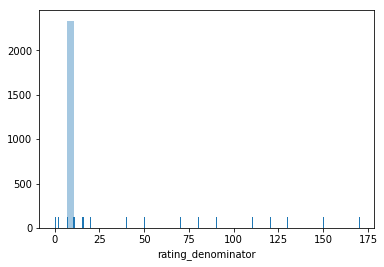

In [15]:
sns.distplot(tweet_df['rating_denominator'], kde=False, rug=True)

It is good to see the most of the rows have value as 10, but we do have records where values are strange. We can do a count by values to look at it.

In [16]:
tweet_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

There are a few rows with values other than 10. These rows don't help the analysis, and will require cleaning in the next stage.

### 4.
We can try the similar method for numerator. We expect the numerators to be above 10 in this rating system. Our purpose here is to see if we have outliers and un-usable values.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


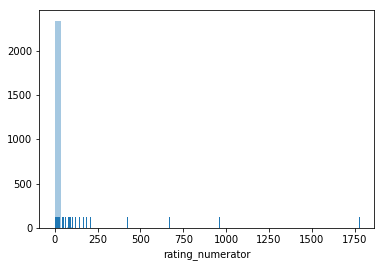

In [17]:
sns.distplot(tweet_df['rating_numerator'], kde=False, rug=True)

In [18]:
tweet_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

There are some very large values and oddly for this rating system, we have some ratings below 10.

### 5.
We can now look at the dog categories to see if we have junk characters or data that is difficult to use when we try to use classifications in our analysis later.

In [21]:
predictions_df['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
teddy                         18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

To better use this text field for classification, it will help to have a consistent format. We can lower case all the categories for better use in analysis.

Summary of issues at the assessment stage of the data.

Data Issues
1. Data was gathered from 3 different sources - file, file server, api. The no. of rows in each set are different. Not all data for the tweet_ids in the main set was retrieved from other sources.
2. The tweet data has retweets.
3. Underscore char found in many dog categories (dog names).
4. Rating denominator value has many issues. Numerator values also have outliers and values that don't fit the system.
5. 5 columns in the main data set have no values at all.
6. The dog predictions data set has many rows where one of the predictions is true, but the image is not of a dog.
7. Cannot use the url fields.
8. Dog stage has no value for many dogs.
9. Some rows have more than one dog stage. This will need to be cleaned to use dog stage in analysis.

Tidiness
1. Dataframes can be combined. 3 can be combined into 2. The tweet_enhanced data can be combined with the api data as both have information about the tweets. We can keep the predictions data set separate and use a tweet_id join for analysis.
2. Dog stage could have been 1 column with 4 possible values instead of 4 different columns and many nulls.

# 3. Data Cleaning

I will look at each of the data issues and try to clean them. In the process, will create copies of the original data frames and work with them for cleaning the datasets.

In [12]:
tweet_copy_df = tweet_df.copy()
tweet_copy_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
pred_copy_df = predictions_df.copy()
pred_copy_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
api_copy_df = api_df.copy()
api_copy_df.head()

,created_at,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,37639,False,8206,False,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,32345,False,6071,False,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,24367,False,4011,False,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,40962,False,8366,False,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,39162,False,9063,False,891327558926688256


Define --> Retweets: Remove all the rows that are retweets.

Code

In [15]:
tweet_copy_df = tweet_copy_df[tweet_copy_df['retweeted_status_id'].notnull() == False]

Test to check the count is 181

In [16]:
#Compare original df with the modified df and check the count difference.
length = len(tweet_df)-len(tweet_copy_df)
print('{}'.format(length))

181


Define --> Columns with missing data: Remove all the columns which have no/less data

Code

In [17]:
tweet_copy_df = tweet_copy_df.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

Test if columns dropped

In [18]:
tweet_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


Define --> Datatypes: Change data types of following fields to appropriate data types. Use astype function

tweet_df
tweet_id => string
timestamp => datetime
rating_numerator => float
rating_denominator => float

api_df
created_at => datetime
tweet_id => string

predictions_df
tweet_id => string


Code for each dataset

In [19]:
tweet_copy_df['tweet_id'] = tweet_copy_df['tweet_id'].astype('str')
tweet_copy_df['timestamp'] = pd.to_datetime(tweet_copy_df['timestamp'])
tweet_copy_df['rating_numerator'] = tweet_copy_df['rating_numerator'].astype('float')
tweet_copy_df['rating_denominator'] = tweet_copy_df['rating_denominator'].astype('float')

In [20]:
api_copy_df['created_at'] = pd.to_datetime(api_copy_df['created_at'])
api_copy_df['tweet_id'] = api_copy_df['tweet_id'].astype('str')

In [21]:
pred_copy_df['tweet_id'] = pred_copy_df['tweet_id'].astype('str')

Test all 3 datasets using the info() method

In [22]:
#use info() method to confirm the above steps.
tweet_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), object(9)
memory usage: 220.9+ KB


In [23]:
pred_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [24]:
api_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 6 columns):
created_at        2337 non-null datetime64[ns, UTC]
favorite_count    2337 non-null int64
favorited         2337 non-null bool
retweet_count     2337 non-null int64
retweeted         2337 non-null bool
tweet_id          2337 non-null object
dtypes: bool(2), datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 77.7+ KB


Define --> Melt the 4 dog stages 'doggo', 'floofer', 'pupper', and 'puppo' into 1 column 'dog_stage. Also, as noted earlier, there are some rows with more than one value for dog stage. We need to identify and get rid of these rows and then melt the columns into one.

Pre - test

In [19]:
#check counts of each type
tweet_copy_df['doggo'].value_counts()

None     2088
doggo      87
Name: doggo, dtype: int64

In [20]:
tweet_copy_df['floofer'].value_counts()

None       2165
floofer      10
Name: floofer, dtype: int64

In [21]:
tweet_copy_df['pupper'].value_counts()

None      1941
pupper     234
Name: pupper, dtype: int64

In [22]:
tweet_copy_df['puppo'].value_counts()

None     2150
puppo      25
Name: puppo, dtype: int64

In [25]:
#Test using groupBy
tweet_copy_df.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1831
1,None,None,None,puppo,24
2,None,None,pupper,None,224
3,None,floofer,None,None,9
4,doggo,None,None,None,75
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


Code

In [28]:
#convert all None to empty string
tweet_copy_df.loc[tweet_copy_df.doggo == 'None', 'doggo'] = ''
tweet_copy_df.loc[tweet_copy_df.floofer == 'None', 'floofer'] = ''
tweet_copy_df.loc[tweet_copy_df.pupper == 'None', 'pupper'] = ''
tweet_copy_df.loc[tweet_copy_df.puppo == 'None', 'puppo'] = ''

tweet_copy_df['doggo'].value_counts()

         2088
doggo      87
Name: doggo, dtype: int64

In [29]:
tweet_copy_df['floofer'].value_counts()

           2165
floofer      10
Name: floofer, dtype: int64

In [30]:
tweet_copy_df['pupper'].value_counts()

          1941
pupper     234
Name: pupper, dtype: int64

In [31]:
tweet_copy_df['puppo'].value_counts()

         2150
puppo      25
Name: puppo, dtype: int64

In [33]:
#Merge the 4 columns into one dog_stage column
tweet_copy_df['dog_stage'] = tweet_copy_df.doggo + tweet_copy_df.floofer + tweet_copy_df.pupper + tweet_copy_df.puppo
tweet_copy_df.loc[tweet_copy_df.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
tweet_copy_df.loc[tweet_copy_df.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
tweet_copy_df.loc[tweet_copy_df.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

Test

In [34]:
tweet_copy_df['dog_stage'].value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

Define --> Dog prediction columns: Normalize the predictions 
- If all three say dog, then dog
- If either one predictions doesn't say dog, then not_sure
- If none say dog, then not_dog

Convert them into int first.

Code

In [35]:
predictions = ['p1_dog', 'p2_dog', 'p3_dog']
for p in predictions:
    pred_copy_df[p] = pred_copy_df[p].astype(int)

In [36]:
pred_copy_df.loc[(pred_copy_df['p1_dog']+pred_copy_df['p2_dog']+pred_copy_df['p3_dog'] == 0),'Prediction'] = 'not_dog'
pred_copy_df.loc[(pred_copy_df['p1_dog']+pred_copy_df['p2_dog']+pred_copy_df['p3_dog'] == 1),'Prediction'] = 'not_sure'
pred_copy_df.loc[(pred_copy_df['p1_dog']+pred_copy_df['p2_dog']+pred_copy_df['p3_dog'] == 2),'Prediction'] = 'not_sure'
pred_copy_df.loc[(pred_copy_df['p1_dog']+pred_copy_df['p2_dog']+pred_copy_df['p3_dog'] == 3),'Prediction'] = 'dog'

Test

In [37]:
#check
pred_copy_df['Prediction'].value_counts()

dog         1243
not_sure     508
not_dog      324
Name: Prediction, dtype: int64

Define --> Tweet_df - Incorrect names

In [38]:
#check value counts of names to identify a pattern of incorrect names
tweet_df['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Bailey        7
an            7
Toby          7
Buddy         7
Milo          6
Scout         6
Rusty         6
Bella         6
Dave          6
Oscar         6
Leo           6
Stanley       6
Jax           6
Koda          6
Jack          6
Finn          5
           ... 
Margo         1
Strudel       1
Asher         1
Jimbo         1
Julio         1
Rooney        1
Timofy        1
Pubert        1
Sage          1
Crimson       1
Butters       1
Godzilla      1
Rupert        1
Brandy        1
Tassy         1
Gòrdón        1
Juckson       1
Howie         1
Georgie       1
Ivar          1
Samsom        1
Blakely       1
Roscoe        1
Chubbs        1
Leonard       1
Iroh          1
Winifred      1
Claude        1
Clarq         1
Fabio         1
Name: name, Length: 957,

In [39]:
#check unique values for a better understanding - for now, all names starting with upper_case char look like good values.
tweet_copy_df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

Code

In [40]:
#we'll replace the incorrect names (starting with lower_case char) with none and fuse it into the dataframe
names=[]

#fcheck if first letter is lower_case - if yes, append None, else leave as is.
def lower_case_char(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# use apply by columns
tweet_copy_df.apply(lower_case_char, axis=1)


#add field to df
tweet_copy_df['names'] = names
tweet_copy_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,names
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,,,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,,,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,,,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,,,,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,,,,Franklin


In [41]:
#copy new temp col to actual name col
tweet_copy_df['name'] = tweet_copy_df['names']

In [42]:
#drop names col
tweet_copy_df = tweet_copy_df.drop('names', axis=1)

Test

In [43]:
tweet_copy_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,,,


Define --> Drop the 4 stage columns - doggo, pupper, floofer, puppo

Code

In [44]:
tweet_copy_df = tweet_copy_df.drop(columns=['doggo','pupper','floofer','puppo'])

Test

In [45]:
tweet_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 169.9+ KB


Define --> drop expanded_urls column

Code

In [46]:
#also drop expanded_urls - as we will not use it in analysis
tweet_copy_df = tweet_copy_df.drop('expanded_urls', axis=1)

Test

In [47]:
tweet_copy_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,


Define --> Inconsistent rating denominator
Tweets that do not have 10 as the denominator - compare values with text of the tweet to see data inconsistency

Code

In [48]:
#Count of tweets where we don't have '/10' in text
print("Count: {}".format(tweet_copy_df[~tweet_copy_df['text'].str.contains('/10')]['tweet_id'].count()))

Count: 16


In [49]:
#remove these
tweet_copy_df = tweet_copy_df[tweet_copy_df['text'].str.contains('/10')]

In [50]:
#count tweets that do not have 10 in denominator
print("Count: {}".format(tweet_copy_df[tweet_copy_df['rating_denominator'] != 10].tweet_id.count()))

Count: 6


In [51]:
#take a look at these 6 tweets to try and fix manually
tweet_copy_df[tweet_copy_df['rating_denominator'] != 10].text


313     @jonnysun @Lin_Manuel ok jomny I know you're e...
1068    After so many requests, this is Bretagne. She ...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1662    This is Darrel. He just robbed a 7/11 and is i...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object

In [52]:
#Force the denominator to be 10
ind = tweet_copy_df[tweet_copy_df['rating_denominator'] != 10].index
for i in ind:
    tweet_copy_df.at[i, 'rating_denominator'] = 10

Test

In [53]:
tweet_copy_df['rating_denominator'].value_counts() #looks good now

10.0    2159
Name: rating_denominator, dtype: int64

Define --> Rating numerator - check to see if they can be fixed manually based on the information available in text. or remove them if they cannot be fixed.

Code

In [54]:
tweet_copy_df['rating_numerator'].value_counts()

12.0      500
10.0      442
11.0      425
13.0      307
9.0       156
8.0        98
7.0        54
14.0       43
5.0        36
6.0        32
3.0        19
4.0        16
2.0         9
1.0         8
420.0       2
0.0         2
17.0        1
182.0       1
15.0        1
960.0       1
75.0        1
50.0        1
26.0        1
1776.0      1
666.0       1
27.0        1
Name: rating_numerator, dtype: int64

In [55]:
tweet_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2159 non-null object
timestamp             2159 non-null datetime64[ns, UTC]
source                2159 non-null object
text                  2159 non-null object
rating_numerator      2159 non-null float64
rating_denominator    2159 non-null float64
name                  2159 non-null object
dog_stage             2159 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 231.8+ KB


In [56]:
#create a temp df with just id, text, numerator and denominator
df = tweet_copy_df

In [57]:
df = df.drop(['timestamp','source','name','dog_stage'],axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 4 columns):
tweet_id              2159 non-null object
text                  2159 non-null object
rating_numerator      2159 non-null float64
rating_denominator    2159 non-null float64
dtypes: float64(2), object(2)
memory usage: 164.3+ KB


In [59]:
df = df[df.rating_numerator > 20]

In [60]:
df.head(10)

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,420.0,10.0
189,855860136149123072,@s8n You tried very hard to portray this good ...,666.0,10.0
290,838150277551247360,@markhoppus 182/10,182.0,10.0
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0
979,749981277374128128,This is Atticus. He's quite simply America af....,1776.0,10.0
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of ...,26.0,10.0
2074,670842764863651840,After so many requests... here you go.\n\nGood...,420.0,10.0


By manually looking at the above tweets, based on the tweet text we realize that the numerator values are erraneous. Hence, in the following steps, we manually correct them. Starting with tweet_id = 778027034220126208, the text mentions 11.27 and the numerator value is 27. We fix this by rounding it to the nearest whole number, i.e., 11.

We do the similar to other two tweets as show below.


In [61]:
#for id 778027034220126208 - the tweet attempted 11.27 and not 27. 
tweet_copy_df.loc[tweet_copy_df.tweet_id == 778027034220126208, 'rating_numerator'] = 11

In [62]:
#similarly
tweet_copy_df.loc[tweet_copy_df.tweet_id == 680494726643068929, 'rating_numerator'] = 11  # 11.26 to 11 from 26

In [63]:
tweet_copy_df.loc[tweet_copy_df.tweet_id == 786709082849828864, 'rating_numerator'] = 10  # 9.75 to 10 from 75

Test

In [64]:
tweet_copy_df['rating_numerator'].value_counts()

12.0      500
10.0      442
11.0      425
13.0      307
9.0       156
8.0        98
7.0        54
14.0       43
5.0        36
6.0        32
3.0        19
4.0        16
2.0         9
1.0         8
420.0       2
0.0         2
17.0        1
182.0       1
15.0        1
960.0       1
75.0        1
50.0        1
26.0        1
1776.0      1
666.0       1
27.0        1
Name: rating_numerator, dtype: int64

Values under 10 for numerator are inconsistent for this unique rating system, but we'll just assume that there are "outliers" among people who didn't like those dogs. 

Define --> Combine the dataframes for easier analysis as mentioned in the tidiness list.
Get rid of columns that have already been used in cleaning and merge the dataframes.

Code

In [65]:
pred_copy_df = pred_copy_df.drop(columns=['p1_dog','p2_dog','p3_dog'])

tweet_copy_df = tweet_copy_df.drop(columns=['text'])

api_copy_df = api_copy_df.drop(columns=['created_at','favorited','retweeted'])

In [66]:
#inner join on twitter csv data and json api data
joined_df = tweet_copy_df.merge(api_copy_df, on='tweet_id',how='inner')

In [67]:
#join the twitter data and api data with the image predictions data using a left join
main_df = joined_df.merge(pred_copy_df, on='tweet_id', how='left')

Test

In [68]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 18 columns):
tweet_id              2155 non-null object
timestamp             2155 non-null datetime64[ns, UTC]
source                2155 non-null object
rating_numerator      2155 non-null float64
rating_denominator    2155 non-null float64
name                  2155 non-null object
dog_stage             2155 non-null object
favorite_count        2155 non-null int64
retweet_count         2155 non-null int64
jpg_url               1977 non-null object
img_num               1977 non-null float64
p1                    1977 non-null object
p1_conf               1977 non-null float64
p2                    1977 non-null object
p2_conf               1977 non-null float64
p3                    1977 non-null object
p3_conf               1977 non-null float64
Prediction            1977 non-null object
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(9)
memory usage: 319.9+ KB


In [69]:
main_df.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,Prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Phineas,,37639,8206,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,bagel,0.085851,banana,0.076110,not_dog
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Tilly,,32345,6071,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,dog
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Archie,,24367,4011,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,dog
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Darla,,40962,8366,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,Labrador_retriever,0.168086,spatula,0.040836,not_sure
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Franklin,,39162,9063,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,dog


In [70]:
#persist these data frames.
main_df.to_csv('twitter_api_joined.csv', index=False)


# Analysis

Using the merged twitter data and the predictions data, we'll try to discover more interesting information.

In [73]:
twitter_df = pd.read_csv('twitter_api_joined.csv')
twitter_df.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,Prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Phineas,NaN,37639,8206,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,bagel,0.085851,banana,0.076110,not_dog
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Tilly,NaN,32345,6071,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,dog
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Archie,NaN,24367,4011,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,dog
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Darla,NaN,40962,8366,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,Labrador_retriever,0.168086,spatula,0.040836,not_sure
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Franklin,NaN,39162,9063,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,dog


Taking a look at the most popular dog names using the twitter_df

In [63]:
from collections import Counter

a = twitter_df['name']

#pick first 11 as "None" will be one of them.
count = Counter(a)
count.most_common(11)

[('None', 761),
 ('Lucy', 11),
 ('Cooper', 10),
 ('Oliver', 10),
 ('Charlie', 10),
 ('Penny', 9),
 ('Tucker', 9),
 ('Lola', 8),
 ('Winston', 8),
 ('Sadie', 8),
 ('Daisy', 7)]

What are the different breeds in our dataset - filter the df on Predition == 'Dog'

In [64]:
breeds = twitter_df[twitter_df.Prediction == 'dog'].p1.value_counts()
breeds

golden_retriever                  113
Pembroke                           77
Labrador_retriever                 69
Chihuahua                          50
pug                                39
Pomeranian                         28
chow                               26
malamute                           26
toy_poodle                         26
Samoyed                            24
cocker_spaniel                     23
miniature_pinscher                 20
French_bulldog                     19
Siberian_husky                     17
beagle                             17
German_shepherd                    17
Staffordshire_bullterrier          16
Shih-Tzu                           15
Shetland_sheepdog                  15
Chesapeake_Bay_retriever           15
Rottweiler                         15
Maltese_dog                        15
Eskimo_dog                         14
Cardigan                           14
American_Staffordshire_terrier     13
Italian_greyhound                  13
Lakeland_ter

Text(0.5, 1.0, 'Different breeds?')

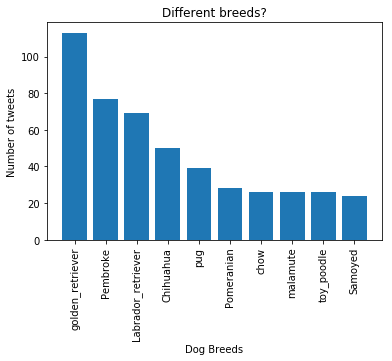

In [65]:
#plot them on vertical bar chart
plt.bar(breeds[0:10].index,breeds[0:10])
plt.xticks(rotation='vertical')
plt.xlabel('Dog Breeds')
plt.ylabel('Number of tweets')
plt.title('Different breeds?')

The golden retriever (not surprisingly) is the most popular of the breeds of dogs in our predictions dataset. 

Breeds with most average favorites.
To get this, we'll create a temporary dataset from twitter_df for breeds that have atleast 10 tweets and compute the average.

In [66]:
# Breeds with at least 10 tweets


df = twitter_df

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 18 columns):
tweet_id              2143 non-null int64
timestamp             2143 non-null object
source                2143 non-null object
rating_numerator      2143 non-null float64
rating_denominator    2143 non-null float64
name                  2143 non-null object
dog_stage             2143 non-null object
favorite_count        2143 non-null int64
retweet_count         2143 non-null int64
jpg_url               1966 non-null object
img_num               1966 non-null float64
p1                    1966 non-null object
p1_conf               1966 non-null float64
p2                    1966 non-null object
p2_conf               1966 non-null float64
p3                    1966 non-null object
p3_conf               1966 non-null float64
Prediction            1966 non-null object
dtypes: float64(6), int64(3), object(9)
memory usage: 301.4+ KB


In [68]:
count = df['p1'].value_counts()
df2 = df[df['p1'].isin(count[count > 9].index)]

In [69]:
df2.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,Prediction
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",14.0,10.0,Cassie,doggo,31029,7127,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,Cardigan,0.451038,Chihuahua,0.029248,dog
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Yogi,doggo,19811,2884,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,German_shepherd,0.707046,malinois,0.199396,Norwegian_elkhound,0.049148,dog
2,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None,doggo,26695,5283,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2.0,Labrador_retriever,0.476913,Chesapeake_Bay_retriever,0.174145,German_short-haired_pointer,0.092861,dog
5,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Scout,doggo,15722,3092,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1.0,Chihuahua,0.955156,toy_terrier,0.008054,muzzle,0.006296,not_sure
6,858843525470990336,2017-05-01 00:40:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,doggo,15544,3514,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1.0,golden_retriever,0.578120,Labrador_retriever,0.286059,bloodhound,0.026917,dog


In [78]:
#Filter outliers on ratings
df3 = df2[df2['rating_numerator'] <= 20]
df3.head()

#remove rows with p1 = web_site
df3 = df3[df3.p1 != 'web_site']
df3.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,Prediction
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",14.0,10.0,Cassie,doggo,31029,7127,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,Cardigan,0.451038,Chihuahua,0.029248,dog
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Yogi,doggo,19811,2884,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,German_shepherd,0.707046,malinois,0.199396,Norwegian_elkhound,0.049148,dog
2,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,None,doggo,26695,5283,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2.0,Labrador_retriever,0.476913,Chesapeake_Bay_retriever,0.174145,German_short-haired_pointer,0.092861,dog
5,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Scout,doggo,15722,3092,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1.0,Chihuahua,0.955156,toy_terrier,0.008054,muzzle,0.006296,not_sure
6,858843525470990336,2017-05-01 00:40:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,None,doggo,15544,3514,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1.0,golden_retriever,0.578120,Labrador_retriever,0.286059,bloodhound,0.026917,dog


In [79]:
# Total number of likes grouped by breed
df3.groupby('p1')['favorite_count'].sum()

p1
Airedale                            60094
American_Staffordshire_terrier      93135
Bernese_mountain_dog                64612
Blenheim_spaniel                    88090
Border_collie                      102133
Cardigan                           247164
Chesapeake_Bay_retriever           231098
Chihuahua                          669270
Eskimo_dog                         253863
French_bulldog                     453625
German_shepherd                    192670
Great_Pyrenees                     168170
Italian_greyhound                  132630
Labrador_retriever                1012871
Lakeland_terrier                   209430
Maltese_dog                         50602
Old_English_sheepdog                98289
Pekinese                            88318
Pembroke                           964390
Pomeranian                         275823
Rottweiler                         124586
Samoyed                            498522
Shetland_sheepdog                  146563
Shih-Tzu                       

In [36]:
# Number of tweets per dog breed
df3.groupby('p1')['favorite_count'].count()

p1
Airedale                           12
American_Staffordshire_terrier     13
Bernese_mountain_dog               10
Blenheim_spaniel                   10
Border_collie                      12
Cardigan                           17
Chesapeake_Bay_retriever           23
Chihuahua                          79
Eskimo_dog                         18
French_bulldog                     25
German_shepherd                    20
Great_Pyrenees                     13
Italian_greyhound                  16
Labrador_retriever                 89
Lakeland_terrier                   16
Maltese_dog                        18
Old_English_sheepdog               12
Pekinese                           13
Pembroke                           88
Pomeranian                         37
Rottweiler                         17
Samoyed                            39
Shetland_sheepdog                  18
Shih-Tzu                           17
Siberian_husky                     19
Staffordshire_bullterrier          19
West_High

In [80]:
# Average number of favorites per tweet for each dog breed
df4 = round(df3.groupby('p1')['favorite_count'].sum() / df3.groupby('p1')['favorite_count'].count(),0)
df4.sort_values(ascending=False)

p1
French_bulldog                    18145.0
Cardigan                          14539.0
Eskimo_dog                        14104.0
basset                            13221.0
Lakeland_terrier                  13089.0
Great_Pyrenees                    12936.0
Samoyed                           12783.0
golden_retriever                  11770.0
Labrador_retriever                11381.0
cocker_spaniel                    11095.0
Pembroke                          10959.0
Chesapeake_Bay_retriever          10048.0
kelpie                             9655.0
German_shepherd                    9634.0
chow                               9622.0
Staffordshire_bullterrier          9343.0
boxer                              9010.0
Blenheim_spaniel                   8809.0
Border_collie                      8511.0
Chihuahua                          8472.0
malamute                           8356.0
Italian_greyhound                  8289.0
miniature_pinscher                 8278.0
Old_English_sheepdog           

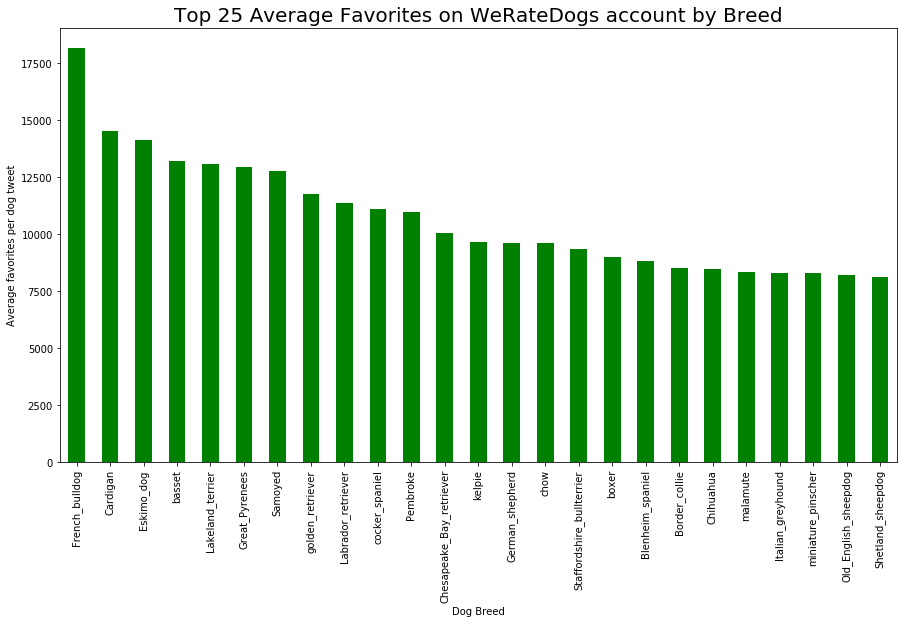

In [81]:
# Plot the average favorites for the top 25 breeds on a bar chart
fig = plt.figure(figsize=(15,8))
df4.sort_values(ascending=False).nlargest(25).plot(kind='bar',color='green')
plt.title("Top 25 Average Favorites on WeRateDogs account by Breed",fontsize=20)
plt.ylabel("Average favorites per dog tweet")
plt.xlabel("Dog Breed");

Let us now try to look at top ratings based on breed and compare it to the above insight

In [82]:
df3.groupby('p1')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,13.0,11.000000,1.527525,8.0,10.00,11.0,12.00,13.0
Bernese_mountain_dog,10.0,11.200000,1.135292,10.0,10.00,11.5,12.00,13.0
Blenheim_spaniel,10.0,11.100000,1.100505,9.0,10.25,11.5,12.00,12.0
Border_collie,12.0,10.583333,2.503028,4.0,9.75,11.5,12.00,13.0
Cardigan,17.0,11.529412,1.280510,9.0,11.00,12.0,13.00,13.0
Chesapeake_Bay_retriever,23.0,10.782609,1.444630,8.0,10.00,10.0,12.00,13.0
Chihuahua,79.0,10.708861,1.975179,3.0,10.00,11.0,12.00,14.0
Eskimo_dog,18.0,11.777778,1.215370,10.0,11.00,12.0,12.75,14.0


In [83]:
#Top ratings
df3.groupby('p1')['rating_numerator'].mean().sort_values(ascending=False).nlargest(10)

p1
Eskimo_dog          11.777778
Samoyed             11.743590
chow                11.609756
golden_retriever    11.530303
Cardigan            11.529412
Great_Pyrenees      11.461538
kelpie              11.454545
Pembroke            11.443182
Siberian_husky      11.315789
cocker_spaniel      11.296296
Name: rating_numerator, dtype: float64

Mean of the ratings for the most rated dogs are very close, and we see the usual suspects here as well.

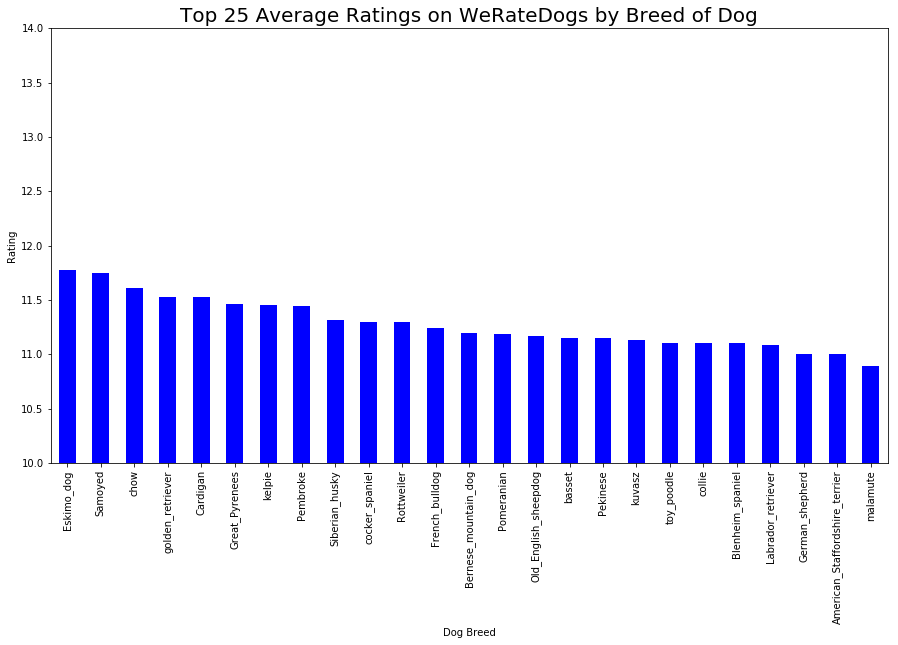

In [84]:
fig = plt.figure(figsize=(15,8))
df3.groupby('p1')['rating_numerator'].mean().sort_values(ascending=False).nlargest(25).plot(kind='bar',color='blue')
plt.title("Top 25 Average Ratings on WeRateDogs by Breed of Dog",fontsize=20)
plt.ylabel("Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,14);

The French Bulldog is clearly the one with most favorites, and for good reason. From the previous bar chart about most tweets where we had the golden retriever leading, we have the breed on this list as well.

Also among the top breeds being favorited on twitter, we have the Eskimo Dog, Labrador, Chihuahua, etc.

This set of data can also be used to draw the trend of favorites to retweets. It is obvious that more people favorite than to retweet, but it would be interesting to see the breeds for which users retweet the most compared to the breeds that are most favorited.

Also, if we are able to gather more data about cost of care, size of the breed - we can perform more analysis on how easy/expensive it is to care for dogs based on breeds.

Sources
https://medium.com/ub-women-data-scholars/we-rate-dogs-twitter-data-analysis-672e1a8903b4
https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf
https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
https://nocodewebscraping.com/twitter-json-examples/
https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value